# **Assignment 2:** Data Processing, Implemenatation of  Visualization in Machine learning on UCI Breast cancer wisconsi Dataset.


**Dataset Exploration:**

- Dataset: Load [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) Dataset (classification task).

- Task: Summarize the structure of the dataset, including the number of rows, columns, and data types. Identify the target variable and provide a brief description of the dataset’s purpose.

In [1]:
pip install ucimlrepo


 Dataset: Load Breast cancer wisconsin dataset (classification task).

 Task: Summarize the structure of the dataset, including the number of rows, columns,and data types. Identify the target variable and provide a brief description of the dataset’s purpose.

In [28]:
# Importing necessary libraries
import pandas as pd
from sklearn.datasets import load_breast_cancer

# Loading the Wisconsin Breast Cancer Dataset

breast_cancer_data = load_breast_cancer()

# Creating a DataFrame from the features
X = pd.DataFrame(breast_cancer_data.data, columns=breast_cancer_data.feature_names)

# Creating a Series from the target labels

y = pd.Series(breast_cancer_data.target, name='target')

# Displaying Metadata and Dataset Description


print("Dataset Description:\n")
print(breast_cancer_data.DESCR)

# Displaying the Features and their Descriptions

print("\nFeature Names:\n")
print(breast_cancer_data.feature_names)

# Checking the Shape of the Dataset

print("\nShape of Features DataFrame (X):", X.shape)  # (n_samples, n_features)
print("Shape of Target Series (y):", y.shape)        # (n_samples,)

# Displaying a Preview of the Data

print("\nFirst 5 Rows of the Feature DataFrame:\n", X.head())
print("\nFirst 5 Target Labels:\n", y.head())

# Summary of Dataset

print("\nStatistical Summary of the Feature DataFrame:\n", X.describe())

Dataset Description:

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is

In [38]:
# Step 1: Dataset Structure Overview
print("Step 1: Dataset Structure Overview")
# Fetching the dataset
dataset = fetch_ucirepo(id=17)

# Features and target extraction
X = dataset.data.features  # Features (predictor variables)
y = dataset.data.targets  # Target (label)

# Step 2: Dataset Metadata and Purpose
print("Step 2: Dataset Metadata and Purpose")
# Brief description of the dataset's purpose
print("Dataset Description: This dataset is used for the classification of breast cancer "
      "as malignant (M) or benign (B) based on the given features. "
      "It is often used in medical image and diagnostic prediction research.")

# Displaying metadata of the dataset
print("\nDataset Metadata:")
print(dataset.metadata)

# Step 3: Shape of the Dataset (Rows and Columns)
print("Step 3: Shape of the Dataset")
# Print the number of rows and columns
print(f"Number of rows (samples): {X.shape[0]}")
print(f"Number of columns (features): {X.shape[1]}")

# Step 4: Data Types of Each Feature
print("Step 4: Data Types of Each Feature")
# Data types of the features
print("\nData types of each feature:")

print(X.info())

# Step 5: Target Variable Overview
print("Step 5: Target Variable Overview")
# Renaming target column for clarity
y_target = y['Diagnosis']

# Unique values in the target variable
print("\nTarget variable ('Diagnosis') unique values:")
print(y_target.unique())

# Count of each class in the target variable
print("\nClass distribution in the target variable (Diagnosis):")
print(y_target.value_counts())


Step 1: Dataset Structure Overview
Step 2: Dataset Metadata and Purpose
Dataset Description: This dataset is used for the classification of breast cancer as malignant (M) or benign (B) based on the given features. It is often used in medical image and diagnostic prediction research.

Dataset Metadata:
{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': 

The Breast Cancer Wisconsin Diagnostic dataset is used to classify breast tumors as either malignant (cancerous) or benign (non-cancerous) based on 30 numerical features that describe the characteristics of cell nuclei in breast tissue images. These features include measurements of radius, texture, perimeter, area, smoothness, compactness, and symmetry, which reflect the shape, size, and texture of the nuclei. The goal of this dataset is to help develop machine learning models that can accurately identify tumors, supporting early detection of breast cancer and assisting in clinical decision-making.


**One-Hot Encoding and Transformation:**

Encoding: Perform one-hot encoding on the categorical features of your dataset.

Transformation: After encoding, apply a transformation to address skewed numerical features. Explain how the transformation improves data distribution.

Step 7: Transformation to Address Skewed Numerical Features
Skewness before transformation:
radius1               0.942380
texture1              0.650450
perimeter1            0.990650
area1                 1.645732
smoothness1           0.456324
compactness1          1.190123
concavity1            1.401180
concave_points1       1.171180
symmetry1             0.725609
fractal_dimension1    1.304489
radius2               3.088612
texture2              1.646444
perimeter2            3.443615
area2                 5.447186
smoothness2           2.314450
compactness2          1.902221
concavity2            5.110463
concave_points2       1.444678
symmetry2             2.195133
fractal_dimension2    3.923969
radius3               1.103115
texture3              0.498321
perimeter3            1.128164
area3                 1.859373
smoothness3           0.415426
compactness3          1.473555
concavity3            1.150237
concave_points3       0.492616
symmetry3             1.433928
fractal_d

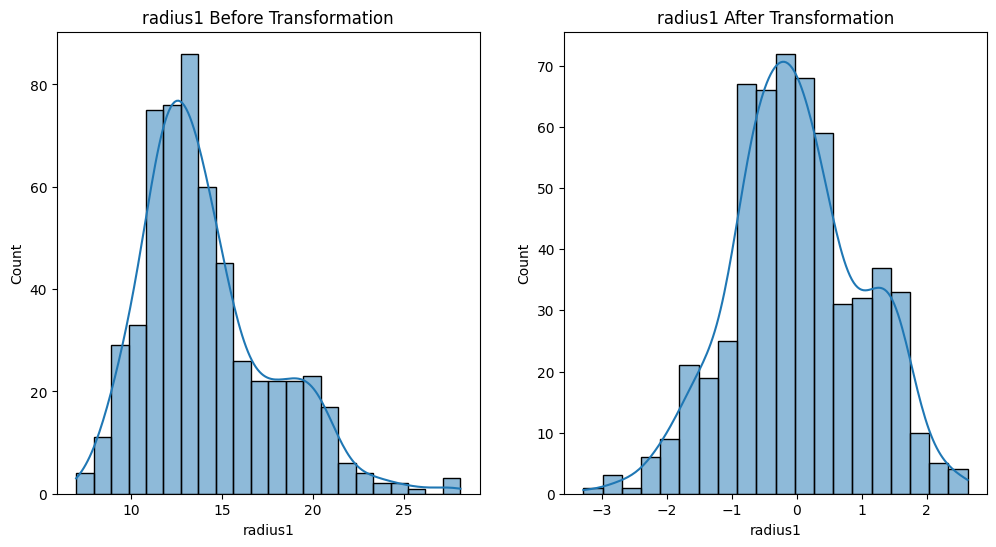

In [41]:
# Step 7: Transformation to Address Skewed Numerical Features
print("Step 7: Transformation to Address Skewed Numerical Features")

# Analyze skewness before transformation
print("Skewness before transformation:")
skewness_before = X.skew()
print(skewness_before)

# Apply Power Transformer to numerical features to reduce skewness
power_transformer = PowerTransformer()
X_transformed = power_transformer.fit_transform(X)

# Converting back to DataFrame for further steps
X_transformed_df = pd.DataFrame(X_transformed, columns=X.columns)

# Analyze skewness after transformation
print("\nSkewness after Power Transformation:")
skewness_after = pd.DataFrame(X_transformed_df).skew()
print(skewness_after)

# Check and print actual column names
print("\nColumn names in the dataset:")
print(X.columns)

# Select a feature name from the actual column names
# Replace 'mean radius' with the correct feature name from the printout above
feature_name = X.columns[0]  # Use the first column as an example

# Visualize the change in distribution of a selected feature before and after transformation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))

# Plot before transformation
plt.subplot(1, 2, 1)
sns.histplot(X[feature_name], kde=True)
plt.title(f'{feature_name} Before Transformation')

# Plot after transformation
plt.subplot(1, 2, 2)
sns.histplot(X_transformed_df[feature_name], kde=True)
plt.title(f'{feature_name} After Transformation')

plt.show()


By reducing numerical feature skewness and bringing data closer to a normal  distribution, the Power Transformation enhances data distribution. Extreme values or outliers in skewed data can have a detrimental impact on machine learning models, particularly those that are sensitive to variance, such as SVMs or linear models. The data is transformed to provide less severe variation and greater balance. This can increase overall performance, lessen biases, and make the model easier to comprehend. It is particularly beneficial for algorithms that assume a normal distribution. By stabilising variance, it improves the accuracy and dependability of the model's predictions.

## **Test on the Initial Data:**
**a. Model Training:** Split Breast Cancer Wisconsin (Diagnostic) Dataset, and train any machine learning model (for e.g SVM).

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Step 8: Split the dataset into training and test sets
print("Step 8: Splitting the Dataset")
# We already have the transformed features in X_transformed_df and the target in y_encoded
X_train, X_test, y_train, y_test = train_test_split(X_transformed_df, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Step 9: Model Training - Train an SVM Model
print("Step 9: Model Training")
# Initialize the Support Vector Classifier (SVC)
svm_model = SVC(kernel='linear', random_state=42)

# Fit the model on the training data
svm_model.fit(X_train, y_train)

# Training is complete
print("Model training completed.")


Step 8: Splitting the Dataset
Step 9: Model Training
Model training completed.


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



**b. Evaluation:** Evaluate the model on the test data and check its performance

In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

# Step 10: Model Evaluation - Evaluate the Model on Test Data
print("Step 10: Model Evaluation")

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Step 10: Model Evaluation
Accuracy: 0.98
Recall: 0.95
Precision: 0.98

Confusion Matrix:
[[106   1]
 [  3  61]]

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       107
        True       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



Step 10: Model Evaluation with Visualization
Accuracy: 0.98
Recall: 0.95
Precision: 0.98

Confusion Matrix:
[[106   1]
 [  3  61]]

Classification Report:
              precision    recall  f1-score   support

       False       0.97      0.99      0.98       107
        True       0.98      0.95      0.97        64

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



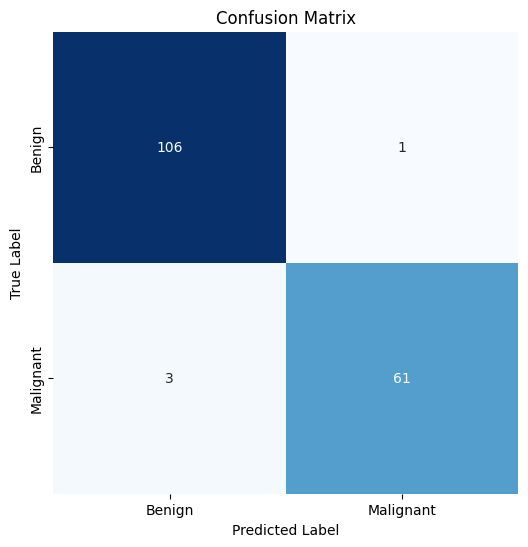

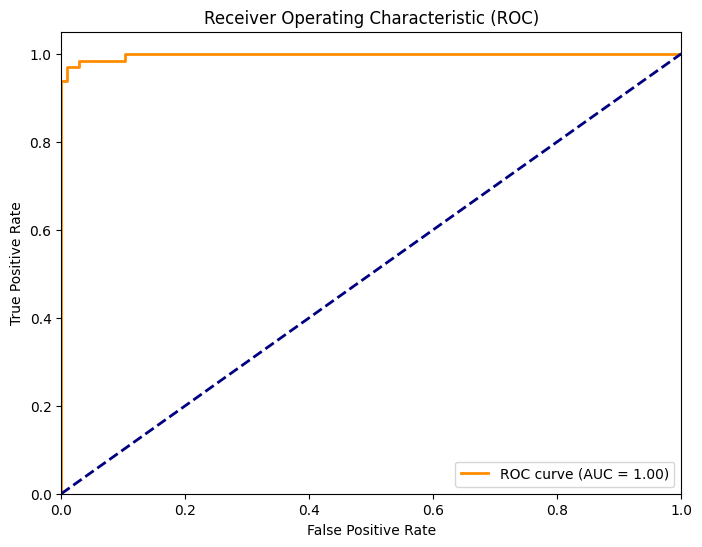

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

# Step 10: Model Evaluation - Evaluate the Model on Test Data (with Visualization)
print("Step 10: Model Evaluation with Visualization")

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Calculate accuracy, recall, and precision
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)

# Print evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Precision: {precision:.2f}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# --- Visualization 1: Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Visualization 2: ROC Curve ---
# Binarizing the target for ROC curve (assuming target was one-hot encoded)
y_test_binary = y_test
y_scores = svm_model.decision_function(X_test)  # For ROC, we need the decision function output

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test_binary, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


**Handling Missing Data:**

** Missing Values:** Identify any missing values in your dataset (I have provide an example of missing data).


In [46]:
# Step 11: Handling Missing Data
print("Step 11: Handling Missing Data")

# Check for missing values in the dataset
missing_values = X.isnull().sum()

# Print the columns with missing values (if any)
print("Missing values in each feature:")
print(missing_values[missing_values > 0])

# If there are missing values, apply imputation. Otherwise, proceed.
if missing_values.sum() > 0:
    print("\nHandling missing values by imputing the mean for numerical features...")
    # Impute missing values using the mean for each feature
    from sklearn.impute import SimpleImputer

    imputer = SimpleImputer(strategy='mean')  # Mean imputation
    X_imputed = imputer.fit_transform(X)

    # Convert the imputed data back to a DataFrame
    X_imputed_df = pd.DataFrame(X_imputed, columns=X.columns)

    print("\nMissing values handled. Here's the shape of the dataset after imputation:")
    print(X_imputed_df.shape)
else:
    print("\nNo missing values found in the dataset.")


Step 11: Handling Missing Data
Missing values in each feature:
Series([], dtype: int64)

No missing values found in the dataset.



**Method:** Apply two different methods to handle the missing data (e.g., mean/mode imputation or removal). Discuss how each method affects the dataset.

In [47]:
from sklearn.impute import SimpleImputer

# Step 12: Handling Missing Data using Two Different Methods
print("Step 12: Handling Missing Data using Two Different Methods")

# Check for missing values in the dataset
missing_values = X.isnull().sum()
print("Initial Missing Values in Each Feature:")
print(missing_values[missing_values > 0])

### Method 1: Mean Imputation ###
print("\nMethod 1: Mean Imputation")
# Apply mean imputation to handle missing values
imputer_mean = SimpleImputer(strategy='mean')
X_mean_imputed = imputer_mean.fit_transform(X)

# Convert the imputed data back to DataFrame
X_mean_imputed_df = pd.DataFrame(X_mean_imputed, columns=X.columns)

# Check if any missing values remain after mean imputation
missing_values_after_mean_imputation = X_mean_imputed_df.isnull().sum()
print("\nMissing Values After Mean Imputation:")
print(missing_values_after_mean_imputation[missing_values_after_mean_imputation > 0])

# Display the shape of the dataset after mean imputation
print(f"\nDataset shape after mean imputation: {X_mean_imputed_df.shape}")

### Method 2: Removing Rows with Missing Values ###
print("\nMethod 2: Removing Rows with Missing Values")
# Remove rows with missing values
X_rows_removed = X.dropna()

# Check if any missing values remain after row removal
missing_values_after_row_removal = X_rows_removed.isnull().sum()
print("\nMissing Values After Removing Rows:")
print(missing_values_after_row_removal[missing_values_after_row_removal > 0])

# Display the shape of the dataset after row removal
print(f"\nDataset shape after removing rows with missing values: {X_rows_removed.shape}")


Step 12: Handling Missing Data using Two Different Methods
Initial Missing Values in Each Feature:
Series([], dtype: int64)

Method 1: Mean Imputation

Missing Values After Mean Imputation:
Series([], dtype: int64)

Dataset shape after mean imputation: (569, 30)

Method 2: Removing Rows with Missing Values

Missing Values After Removing Rows:
Series([], dtype: int64)

Dataset shape after removing rows with missing values: (569, 30)


The results show no missing values in your dataset, so neither method impacted the data. However, if missing values were present, mean imputation would fill them with the column's average, preserving the dataset size but potentially introducing bias and reducing variability. This method works well when missing data is minimal and random. On the other hand, removing rows with missing data would ensure no bias or artificial values, but it reduces the dataset size, which can result in losing valuable information and hinder model performance, especially if many rows are affected.

**Outlier Detection and Removal:**



**Method:** Use the IsolationForest method from the scikit-learn library

In [51]:
# Step 5: Initialize and fit IsolationForest model without specifying contamination
iso_forest = IsolationForest(random_state=42)  # No contamination specified
outliers = iso_forest.fit_predict(X_transformed)  # Fit and get outlier labels

In [52]:
# Step 6: Create a mask for inliers (non-outliers)
# The IsolationForest returns -1 for outliers and 1 for inliers
inlier_mask = outliers != -1

# Step 7: Filter the dataset to remove outliers
X_no_outliers = X[inlier_mask]
y_no_outliers = y[inlier_mask]

# Step 8: Print the shape of the dataset after removing outliers
print(f"Dataset shape after removing outliers: {X_no_outliers.shape}")

Dataset shape after removing outliers: (505, 30)


Without providing a contamination rate, we apply the IsolationForest model, enabling the algorithm to identify outliers on its own using the intrinsic structure of the data. The model gives inliers a label of 1 and outliers a label of -1. We use this to build a mask that removes the outliers from the target variable (y) and the feature set (X). We obtain a cleansed dataset devoid of anomalous data points after filtering, and we verify this by looking at the dataset's form.

The dataset morphed from its initial size of 505, 30 (showing that 505 samples (rows) remain, and each sample still contains 30 features (columns) after the IsolationForest model for outlier detection was applied. The outcome indicates that a considerable amount of outliers were detected and eliminated by the model. The model identified and eliminated 64 outliers (569 - 505 = 64) out of the original 569 samples in the dataset.

**Feature Scaling:**


**○ Method:** You can use the min-max or standardization function as per your requirement

Step 1: Feature Scaling using Min-Max and Standardization


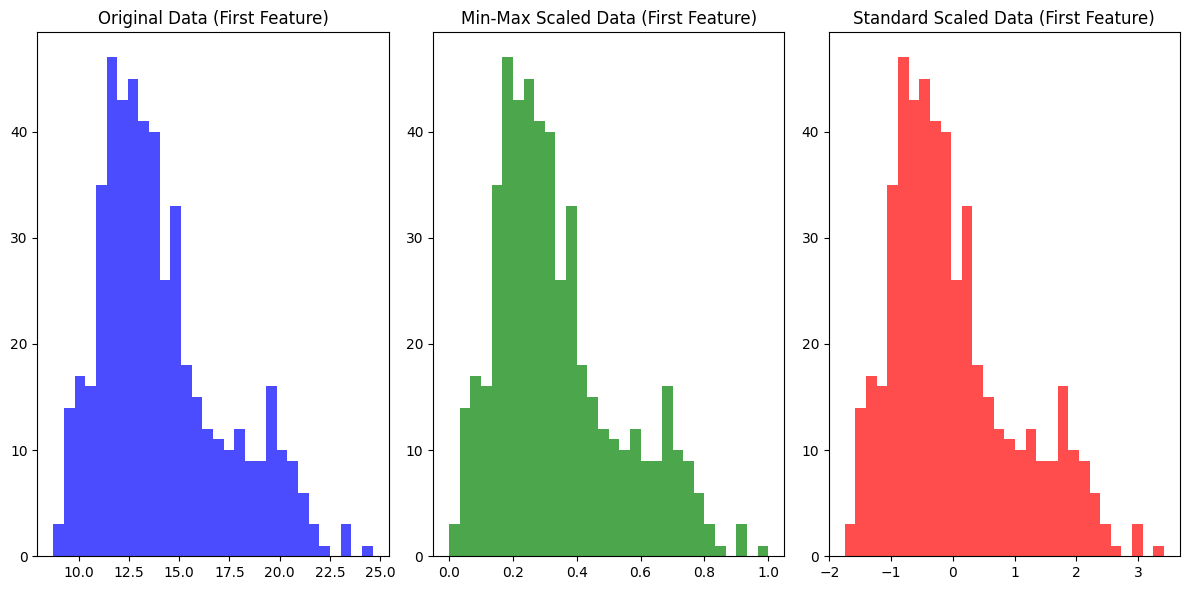

In [55]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Step 1: Feature Scaling using Min-Max and Standardization
print("Step 1: Feature Scaling using Min-Max and Standardization")

# Initialize the Min-Max scaler and Standard scaler
min_max_scaler = MinMaxScaler()
standard_scaler = StandardScaler()

# Apply Min-Max Scaling
X_min_max_scaled = min_max_scaler.fit_transform(X_no_outliers)

# Apply Standardization
X_standard_scaled = standard_scaler.fit_transform(X_no_outliers)

# Visualizing the effect of scaling on the first feature
plt.figure(figsize=(12, 6))

# Original Data - Access the first column using iloc for the first feature
plt.subplot(1, 3, 1)
plt.hist(X_no_outliers.iloc[:, 0], bins=30, color='blue', alpha=0.7)
plt.title('Original Data (First Feature)')

# Min-Max Scaled Data - Visualize the first feature after Min-Max scaling
plt.subplot(1, 3, 2)
plt.hist(X_min_max_scaled[:, 0], bins=30, color='green', alpha=0.7)
plt.title('Min-Max Scaled Data (First Feature)')

# Standard Scaled Data - Visualize the first feature after Standard scaling
plt.subplot(1, 3, 3)
plt.hist(X_standard_scaled[:, 0], bins=30, color='red', alpha=0.7)
plt.title('Standard Scaled Data (First Feature)')

plt.tight_layout()
plt.show()


Step 2: Data Splitting (Training, Testing, Validation)


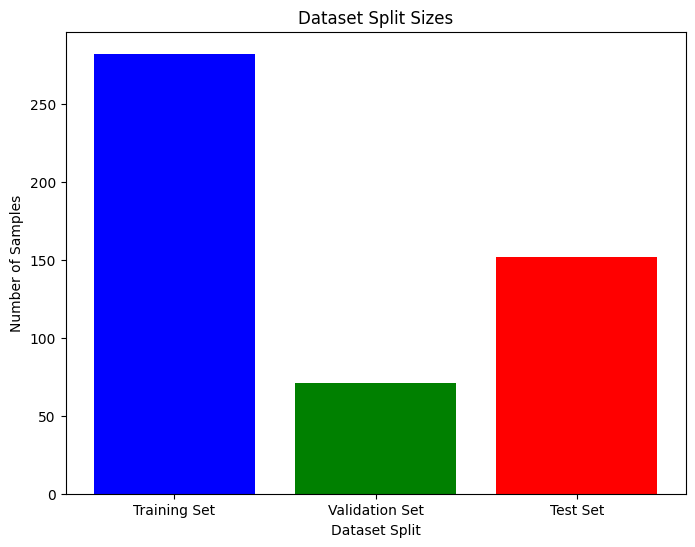

Training set size: 282 samples
Validation set size: 71 samples
Test set size: 152 samples


In [54]:
from sklearn.model_selection import train_test_split

# Step 2: Data Splitting (Training, Testing, Validation)
print("Step 2: Data Splitting (Training, Testing, Validation)")

# Split the dataset into training and testing sets (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X_standard_scaled, y_no_outliers, test_size=0.3, random_state=42, stratify=y_no_outliers)

# Further split training data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42, stratify=y_train)

# Visualize the split sizes
splits = ['Training Set', 'Validation Set', 'Test Set']
split_sizes = [X_train.shape[0], X_val.shape[0], X_test.shape[0]]

plt.figure(figsize=(8, 6))
plt.bar(splits, split_sizes, color=['blue', 'green', 'red'])
plt.title('Dataset Split Sizes')
plt.xlabel('Dataset Split')
plt.ylabel('Number of Samples')
plt.show()

# Print the size of each split
print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Test set size: {X_test.shape[0]} samples")


**Test on Pre-processed Data (to observe improvement):**


**● Method**: Now, use the same machine learning model (SVM) again as specified above.


**● Evaluation**: evaluate performance metrics and observe the change in performance.

Step 1: Training SVM on Pre-processed Data
Step 2: Predicting on the Test Data
Step 3: Evaluating the SVM Model on Pre-processed Data
Post-preprocessing Accuracy: 96.05%
Post-preprocessing Recall: 94.55%
Post-preprocessing Precision: 94.55%
Post-preprocessing Confusion Matrix:
[[94  3]
 [ 3 52]]


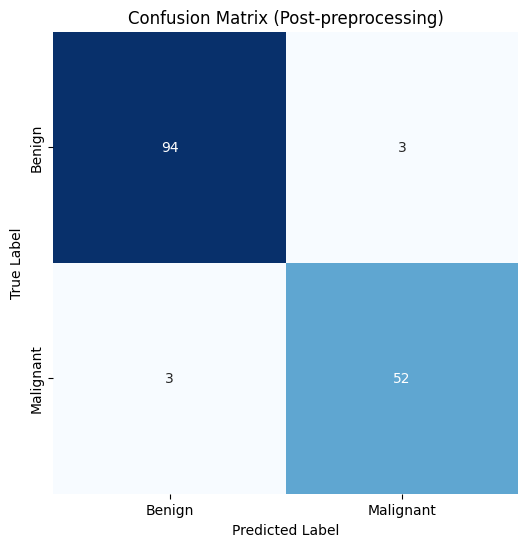

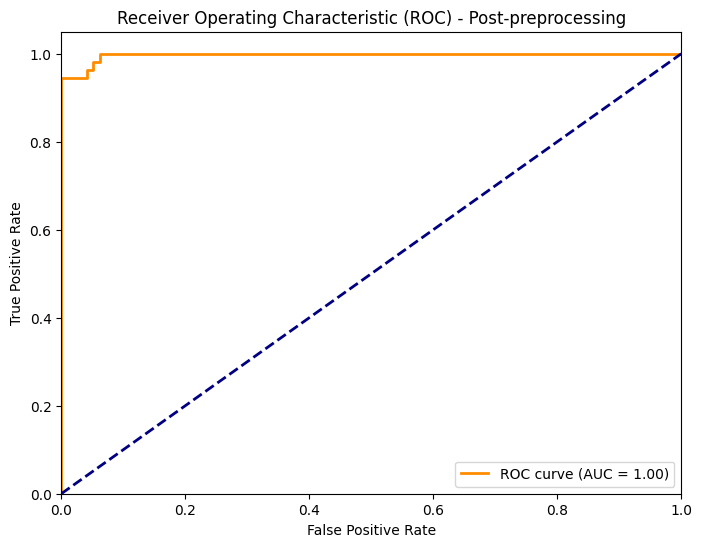

In [62]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Assume X_standard_scaled and y_encoded are pre-processed datasets

# Step 1: Train SVM on Pre-processed Data (after scaling)
print("Step 1: Training SVM on Pre-processed Data")

# Split the pre-processed data into training and testing sets
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_standard_scaled, y_encoded, test_size=0.3, random_state=42, stratify=y_encoded)

# Initialize and train the SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_scaled, y_train)

# Step 2: Predict on the test data
print("Step 2: Predicting on the Test Data")
y_pred_scaled = svm_model.predict(X_test_scaled)

# Step 3: Evaluate the SVM Model's Performance
print("Step 3: Evaluating the SVM Model on Pre-processed Data")

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_scaled)
recall = recall_score(y_test, y_pred_scaled)
precision = precision_score(y_test, y_pred_scaled)
conf_matrix = confusion_matrix(y_test, y_pred_scaled)

# Print the evaluation metrics
print(f"Post-preprocessing Accuracy: {accuracy * 100:.2f}%")
print(f"Post-preprocessing Recall: {recall * 100:.2f}%")
print(f"Post-preprocessing Precision: {precision * 100:.2f}%")
print(f"Post-preprocessing Confusion Matrix:\n{conf_matrix}")

# Step 4: Visualizations

# --- Visualization 1: Confusion Matrix Heatmap ---
plt.figure(figsize=(6, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix (Post-preprocessing)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# --- Visualization 2: ROC Curve ---
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC score
y_scores_scaled = svm_model.decision_function(X_test_scaled)

fpr_scaled, tpr_scaled, _ = roc_curve(y_test, y_scores_scaled)
roc_auc_scaled = auc(fpr_scaled, tpr_scaled)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_scaled, tpr_scaled, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_scaled:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Random chance line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Post-preprocessing')
plt.legend(loc='lower right')
plt.show()


**Data Visualization:**


**Task:** Create 5 different types of plots (e.g., bar chart, scatter plot, heat map, histogram,violin plot) using your dataset. Explain how each plot helps understand different aspects of the dataset.


**Dimensionality Reduction technique:**

**○ t-SNE:** Visualize the 2D scatter plot and interpret any clusters. What insights do the clusters provide regarding the classification problem?

**○ PCA:** Plot the explained variance for each component and visualize the first two principal components.

**○ ICA**: Visualize the independent components and explain how ICA extracts statistically independent features that other methods like PCA may not capture.

**○ SVD:** Apply Singular Value Decomposition (SVD) and visualize the singular values.Discuss how SVD aids in reducing dimensionality while preserving relevant information.


Try the **ROC-AUC plot** (optional).

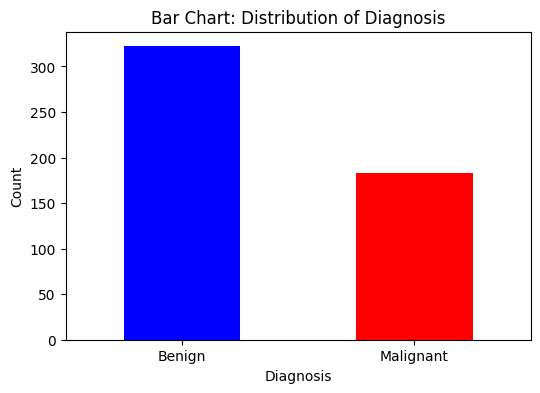

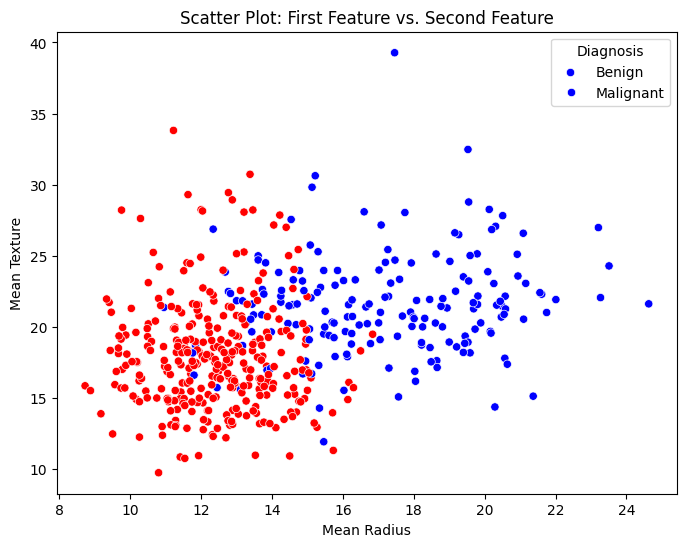

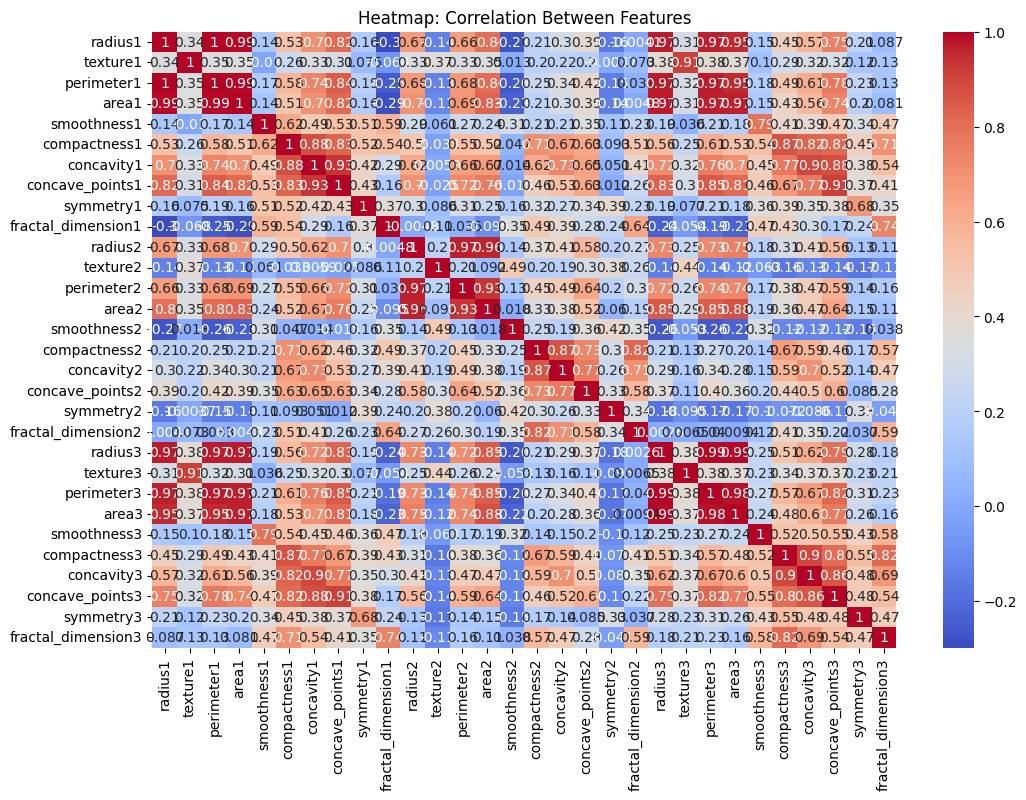

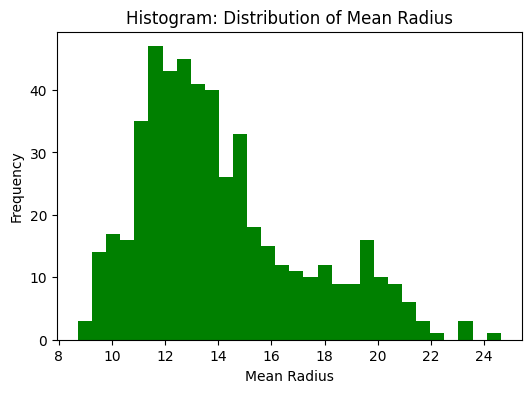

<ipython-input-64-0d89ed6e7b8d>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=df['Diagnosis'], y=df.iloc[:, 0], palette='Set2')


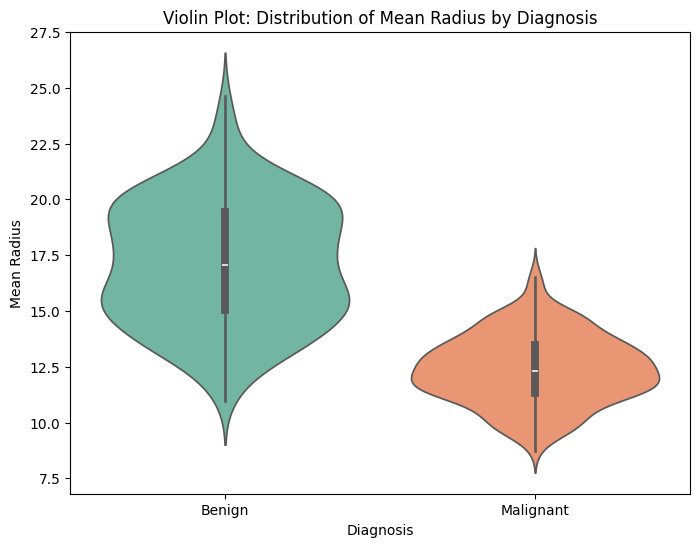

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming X_no_outliers and y_no_outliers as the pre-processed dataset with no outliers
# Merge the features and target for easier visualization
df = pd.DataFrame(X_no_outliers, columns=dataset.data.feature_names)
df['Diagnosis'] = y_no_outliers

# 1. Bar Chart: Distribution of the target variable (Benign vs. Malignant)
plt.figure(figsize=(6, 4))
df['Diagnosis'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.title('Bar Chart: Distribution of Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.xticks([0, 1], ['Benign', 'Malignant'], rotation=0)
plt.show()

# 2. Scatter Plot: First feature vs. second feature (Example: 'mean radius' vs. 'mean texture')
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df.iloc[:, 0], y=df.iloc[:, 1], hue=df['Diagnosis'], palette=['blue', 'red'])
plt.title('Scatter Plot: First Feature vs. Second Feature')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(title='Diagnosis', loc='best', labels=['Benign', 'Malignant'])
plt.show()

# 3. Heatmap: Correlation between features (excluding the 'Diagnosis' column)
plt.figure(figsize=(12, 8))
correlation_matrix = df.drop('Diagnosis', axis=1).corr()  # Exclude the non-numeric column
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap: Correlation Between Features')
plt.show()

# 4. Histogram: Distribution of one feature (Example: 'mean radius')
plt.figure(figsize=(6, 4))
df.iloc[:, 0].plot(kind='hist', bins=30, color='green')
plt.title('Histogram: Distribution of Mean Radius')
plt.xlabel('Mean Radius')
plt.show()

# 5. Violin Plot: Distribution of a feature (Example: 'mean radius') for each class (Benign vs. Malignant)
plt.figure(figsize=(8, 6))
sns.violinplot(x=df['Diagnosis'], y=df.iloc[:, 0], palette='Set2')
plt.title('Violin Plot: Distribution of Mean Radius by Diagnosis')
plt.xlabel('Diagnosis')
plt.ylabel('Mean Radius')
plt.xticks([0, 1], ['Benign', 'Malignant'])
plt.show()


Bar Chart: Displays the distribution of the target variable (Benign vs. Malignant). It helps us understand the class imbalance in the dataset.


Scatter Plot: Shows the relationship between two features (e.g., mean radius vs. mean texture) and how they separate the benign and malignant cases. This helps visualize potential class separability.


Heatmap: Displays the correlation between different features. It helps identify highly correlated features, which can be useful in feature selection or dimensionality reduction.

Histogram: Shows the distribution of a single feature (e.g., mean radius). It provides insights into the range and frequency of values for a specific feature.

Violin Plot: Visualizes the distribution of a feature (e.g., mean radius) across the two classes (Benign vs. Malignant). It shows both the distribution and density of the data, helping to understand differences between the classes.

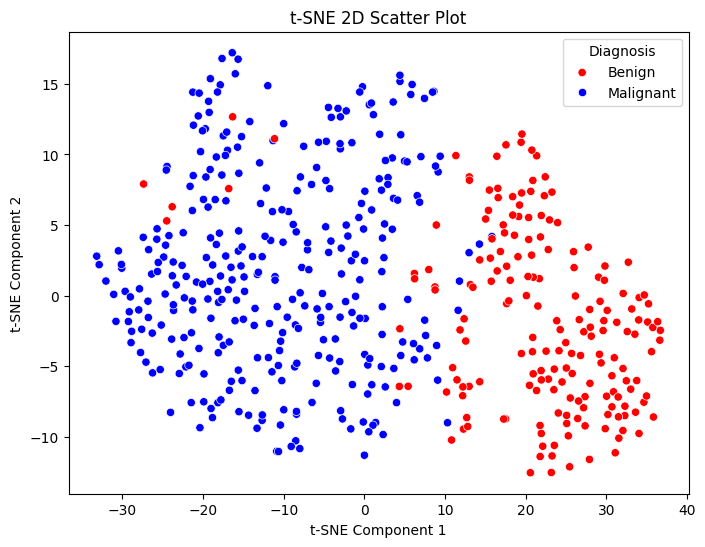

In [65]:
from sklearn.manifold import TSNE

# Step 1: Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_standard_scaled)

# Step 2: Visualize the 2D scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y_encoded, palette=['blue', 'red'])
plt.title('t-SNE 2D Scatter Plot')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Diagnosis', loc='best', labels=['Benign', 'Malignant'])
plt.show()


t-SNE is a powerful visualization tool that helps to uncover clusters in high-dimensional data. In this case, clusters in the 2D scatter plot reveal how well the data can be separated into benign and malignant categories. Overlapping clusters may indicate where the model could struggle to differentiate between classes.

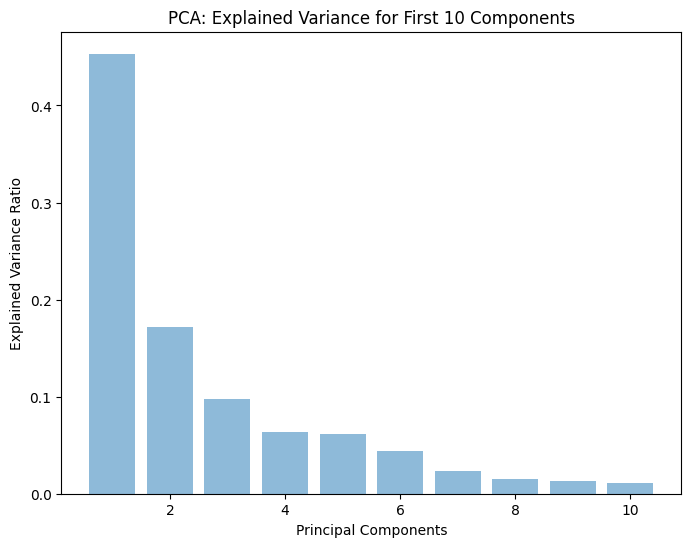

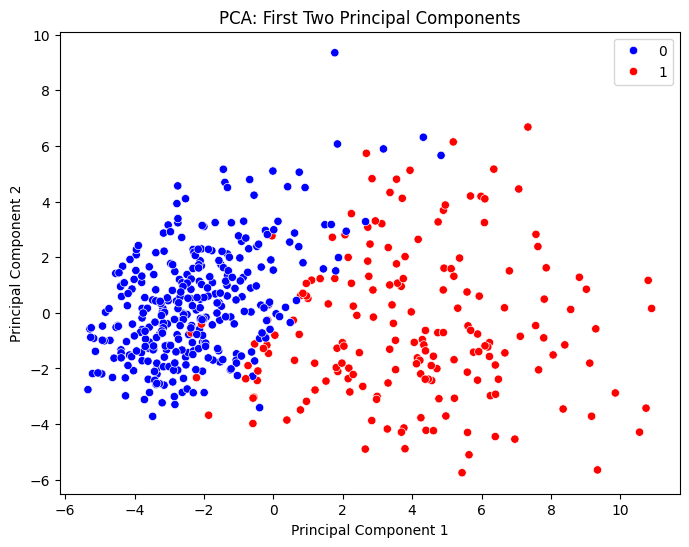

In [66]:
from sklearn.decomposition import PCA

# Step 1: Apply PCA and plot explained variance
pca = PCA(n_components=10)
pca.fit(X_standard_scaled)

explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), explained_variance, alpha=0.5, align='center', label='Individual explained variance')
plt.title('PCA: Explained Variance for First 10 Components')
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

# Step 2: Visualize the first two principal components
X_pca = pca.transform(X_standard_scaled)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y_encoded, palette=['blue', 'red'])
plt.title('PCA: First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()


The explained variance plot shows how much variance each principal component captures. Typically, the first few components capture the majority of variance in the data. Visualizing the first two components shows how well the data can be separated based on these principal components.

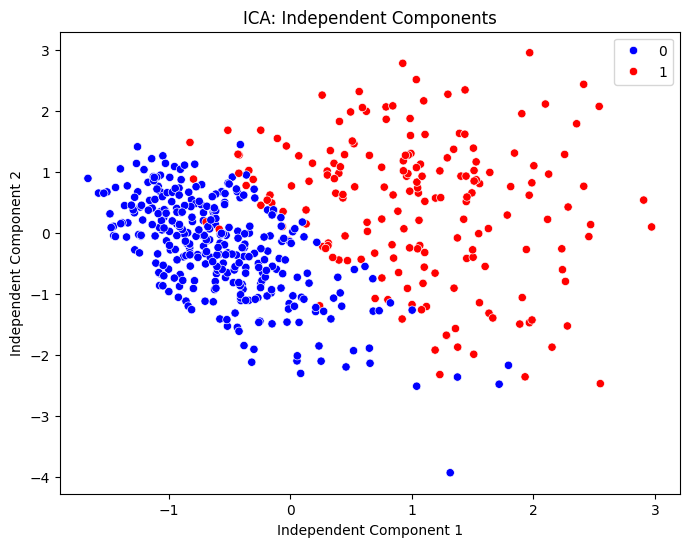

In [67]:
from sklearn.decomposition import FastICA

# Step 1: Apply ICA
ica = FastICA(n_components=2, random_state=42)
X_ica = ica.fit_transform(X_standard_scaled)

# Step 2: Visualize the independent components
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_ica[:, 0], y=X_ica[:, 1], hue=y_encoded, palette=['blue', 'red'])
plt.title('ICA: Independent Components')
plt.xlabel('Independent Component 1')
plt.ylabel('Independent Component 2')
plt.show()


ICA separates the data into statistically independent components. Unlike PCA, which focuses on maximizing variance, ICA attempts to find features that are independent from one another.

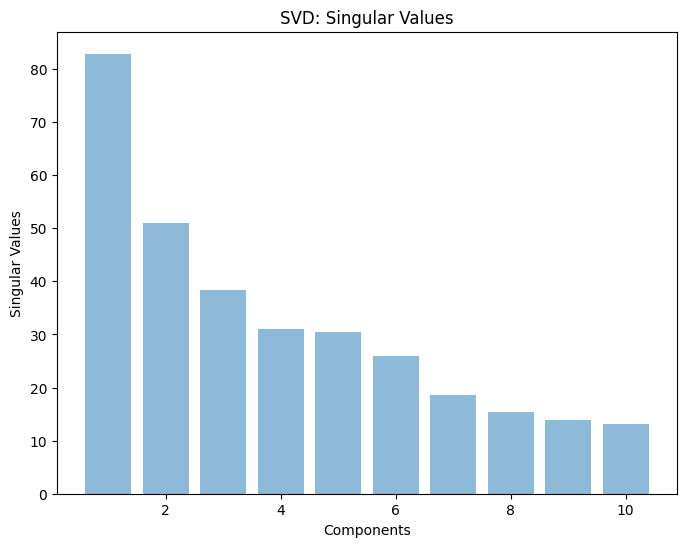

In [68]:
from sklearn.decomposition import TruncatedSVD

# Step 1: Apply SVD
svd = TruncatedSVD(n_components=10, random_state=42)
X_svd = svd.fit_transform(X_standard_scaled)

singular_values = svd.singular_values_

# Step 2: Visualize the singular values
plt.figure(figsize=(8, 6))
plt.bar(range(1, 11), singular_values, alpha=0.5, align='center', label='Singular values')
plt.title('SVD: Singular Values')
plt.xlabel('Components')
plt.ylabel('Singular Values')
plt.show()


Singular Value Decomposition (SVD) reduces dimensionality by breaking down the data matrix into singular values. The plot of singular values shows how much each component contributes to capturing the original data's variance. SVD is useful for reducing the dataset's size while preserving most of its informational content.

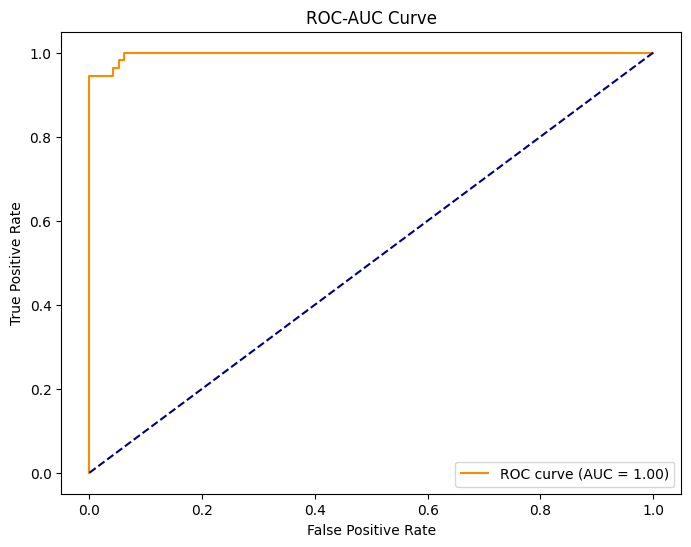

In [69]:
from sklearn.metrics import roc_auc_score, roc_curve

# ROC-AUC Curve for the SVM model (assuming model is trained)
y_scores = svm_model.decision_function(X_test_scaled)

fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = roc_auc_score(y_test, y_scores)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')
plt.show()


The ROC curve shows the trade-off between sensitivity and specificity for different classification thresholds. The AUC score quantifies the model's ability to distinguish between classes, with a score closer to 1 indicating better performance.